<div style="text-align: center;">
<h2>INFSCI 2915 Foundations- Machine Learning - Spring 2018 </h2>
<h1 style="font-size: 250%;">Assignment #2</h1>
<h3>Issued Monday, 2/26/2018; Due Monday, 11:59pm, 3/12/2018</h3>
<h3>Total points: 100 </h3>
</div>

In [99]:
# Type in your information in the double quotes
firstName = "Jiayu"
lastName = "Chen"
pittID = "pic117"

<h3>  Problem #1. Train Test Split [20 points]</h3> 
In this part, you should download **"Iris dataset"**. <br>
Use a code below to download the  dataset: 

In [5]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset=load_iris()
print(dataset.keys()) 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


<h4> Problem #1-1. </h4> Split iris dataset into training and test datasets. (use train_test_split function and random_state=0)

- Report the shape of each (training and test) datasets. What is the proportion of each set? 

In [6]:
features=dataset.data
target=dataset.target
X_train, X_test, Y_train, Y_test= train_test_split(features, target, random_state= 0)
print('The shape of X_train is', X_train.shape)
print('The shape of X_test is', X_test.shape)
print('The shape of Y_train is', Y_train.shape)
print('The shape of Y_test is', Y_test.shape)

proTrain=X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])
proTest=X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])
print('The proportion of train set is', proTrain)
print('The proportion of test set is', proTest)

The shape of X_train is (112, 4)
The shape of X_test is (38, 4)
The shape of Y_train is (112,)
The shape of Y_test is (38,)
The proportion of train set is 0.7466666666666667
The proportion of test set is 0.25333333333333335


<h4> Problem #1-2. </h4>  Split iris dataset into training and test datasets. Make the proportion of training dataset 60% (use train_test_split function and random_state=0)
 

- Report the shape of each (training and test) datasets.

In [7]:
X_train, X_test, Y_train, Y_test= train_test_split(features, target, random_state= 0, test_size=0.4)
print('The shape of X_train is', X_train.shape)
print('The shape of X_test is', X_test.shape)
print('The shape of Y_train is', Y_train.shape)
print('The shape of Y_test is', Y_test.shape)

The shape of X_train is (90, 4)
The shape of X_test is (60, 4)
The shape of Y_train is (90,)
The shape of Y_test is (60,)


<h4> Problem #1-3. </h4>  Split iris dataset into training and test datasets. Make the proportion of test dataset 33.3% (use train_test_split function and random_state=0)
  

- Report the shape of each (training and test) dataset.

In [8]:
X_train, X_test, Y_train, Y_test= train_test_split(features, target, random_state= 0, test_size=0.333)
print('The shape of X_train is', X_train.shape)
print('The shape of X_test is', X_test.shape)
print('The shape of Y_train is', Y_train.shape)
print('The shape of Y_test is', Y_test.shape)

The shape of X_train is (100, 4)
The shape of X_test is (50, 4)
The shape of Y_train is (100,)
The shape of Y_test is (50,)


<h4> Problem #1-4. Random State </h4> 
Split iris dataset into training and test datasets, Use different Random State values (0,  10, 253, 1000, 0 and 10) 

- Analyze the shape and values of the train and test datasets  generated from different Random State values (you can use descriptive statistics) 

- What happens if you do not specify Random State? 

- What is a purpose of using Random State? 

In [9]:
ran_state=[0, 10, 253, 1000, 0, 10]
train_shape=[]
test_shape=[]
train_mean=np.empty([0, 5])
def split(random):
    X_train, X_test, Y_train, Y_test= train_test_split(features, target, random_state=random)
    train=np.column_stack((X_train,Y_train))
    test=np.column_stack((X_test,Y_test))
    train_shape.append(train.shape[0])
    test_shape.append(test.shape[0])
    train_df =  pd.DataFrame(data=train, columns = dataset.feature_names+['target'])
    test_df= pd.DataFrame(data=test, columns = dataset.feature_names+['target'])
    global train_mean
    train_mean = np.append(train_mean, train_df.mean().values.reshape(1,-1), axis=0)

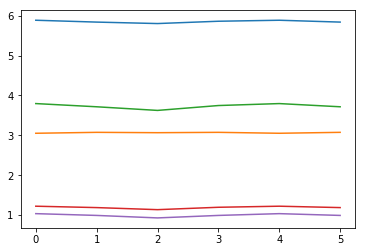

In [10]:
for i in range(len(ran_state)):
    split(ran_state[i])
    
plt.plot(train_mean)
plt.show()

The values of the train and test datasets generated from different Random State values are different with almost same mean values. 

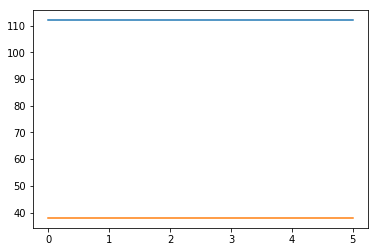

In [11]:
plt.plot(train_shape)
plt.plot(test_shape)
plt.show()

The shape of the train and test datasets generated from different Random State values are the same.<br>
The purpose of using Random State is to guarantee the output is same if using same random_state. This is useful if you want reproducible results. 

<h4> Problem #1-5. Optional (Extra Points) </h4> 


Write a python function that takes the dataset X  (matrix) and Y (numpy array) as an input and returns two non-overlapping datasets: the training and testing data, such that every entry to training set should be selected randomly. The proportion of the training and testing data should be 75%(training)/25%(test). Test your function using the synthetic dataset below. 

In [12]:
import numpy as np 
import pandas as pd
X = np.stack((np.arange(100), 10*np.array(np.arange(100)),100*np.array(np.arange(100)),1000*np.array(np.arange(100))), axis=-1)
Y = np.random.randint(2, size=100)
df = pd.DataFrame(np.concatenate((X,Y[:,None]),axis=1), columns = ("X1","X2","X3","X4", "Y"))
df.head(10)

,X1,X2,X3,X4,Y
0,0,0,0,0,1
1,1,10,100,1000,1
2,2,20,200,2000,0
3,3,30,300,3000,1
4,4,40,400,4000,1
5,5,50,500,5000,1
6,6,60,600,6000,0
7,7,70,700,7000,0
8,8,80,800,8000,1
9,9,90,900,9000,0


In [13]:
#Write your narrative answer here
def rand_split(X,Y):
    randnum=np.random.randint(100)
    print('The random_state is:', randnum)
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state=randnum)
    print('The shape of X_train is:',X_train.shape)
    print('The shape of X_test is:',X_test.shape)
    
rand_split(X,Y)
rand_split(X,Y)

The random_state is: 92
The shape of X_train is: (75, 4)
The shape of X_test is: (25, 4)
The random_state is: 54
The shape of X_train is: (75, 4)
The shape of X_test is: (25, 4)


<h3> Problem #2. Feature Selection  [10 points] </h3>  <br>
In this part, you should download **"Iris dataset"**. <br>
(use code from problem 1 to download dataset)

- Find the best two features using forward and backward selection to the Iris dataset, use a logistic regression model to find a best subset of features.
- Comment your choice 

## forward selection

In [14]:
from sklearn.datasets import load_boston
dataset = load_boston()
whole_df=pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
whole_df['MEDV']=dataset.target
features=['CHAS','RM','TAX', 'LSTAT','MEDV']
df=whole_df[features] 

In [84]:
dataset = load_boston()
from sklearn.metrics import mean_squared_error

dataset = load_boston()
feature_names=['CHAS', 'RM', 'TAX', 'LSTAT']
def forward_selection(feature_name):
    new_data= pd.DataFrame(dataset.data, columns=dataset.feature_names)[[feature_name]]
    X_train,X_test,Y_train,Y_test=train_test_split(new_data.values,dataset.target,random_state=0)
    linreg= LinearRegression().fit(X_train, Y_train)
    Target_predicted= linreg.predict(X_test)
    MSE=mean_squared_error(Y_test,Target_predicted)
    return MSE

min_mse=100
feature_name=''
for i in feature_names:
    MSE = forward_selection(i)
    if MSE < min_mse:
        min_mse=MSE
        feature_name=i
print('The feature with lowest RSS is:', feature_name)

The feature with lowest RSS is: RM


In [83]:
sec_feature_names=['CHAS', 'TAX', 'LSTAT']

def step_selection(feature_name, sec_feature_name):
    new_data= pd.DataFrame(dataset.data, columns=dataset.feature_names)[[feature_name, sec_feature_name]]
    X_train,X_test,Y_train,Y_test=train_test_split(new_data.values,dataset.target,random_state=0)
    linreg= LinearRegression().fit(X_train, Y_train)
    Target_predicted= linreg.predict(X_test)
    MSE=mean_squared_error(Y_test,Target_predicted)
    print('The mean square error of', feature_name, 'and', sec_feature_name,'is', MSE)

sec_min_mse=100
sec_feature_name=''
for i in sec_feature_names:
    sec_MSE = step_selection(feature_name, i)
    if MSE < sec_min_mse:
        sec_min_mse=MSE
        sec_feature_name=i
        
print('\nThe best two features of forward selection is', feature_name, 'and', sec_feature_name)

The mean square error of RM and CHAS is 41.7332338573
The mean square error of RM and TAX is 46.143285854
The mean square error of RM and LSTAT is 35.1922968472

The best two features of forward selection is RM and CHAS


## backward selection

In [ ]:
def backward(data):
    for i in range(1,13):
        Fitting_results=sm.OLS(target, data).fit()
        df1=pd.DataFrame(Fitting_results.pvalues)
        delete=(df1 == df1.max()).idxmax(axis=0)[0]
        data=data.drop(delete, axis=1)
        i=i+1
    print('The best two features using backward selection are:',df1.index)
backward(data)

<h3>  Problem #3. Qualitative Variables  [10 points] </h3>

In this part, you should download and analyze **"Boston House Prices"** dataset. <br>
Use a code below to download the  dataset: 

In [17]:
from sklearn.datasets import load_boston
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


<h4> Problem #3-1. </h4> Follow steps to answer questions.
> *Use train_test_split() with the option "random_state=0".

- Identify qualitative feature in the dataset (a feature with dummy variable). What is an abbreviation for the qualitative feature? (What is a definition of that  abbreviation ?)

- Fit a linear regression model with qualitative variable feature only. Report intercept and coefficient.  

- What can you infer about the qualitative feature from the coefficient? (Hint check lecture:  "Regression with Qualitative Features")

In [18]:
#Write your narrative answer here
df=pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['MEDV']=dataset.target
df.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
import statsmodels.formula.api as smf

model=smf.ols('MEDV ~ CHAS', df)  
Fitting_results=model.fit() 
print(Fitting_results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466


Q1:<BR>
qualitative feature: CHAS <br>
defination: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
Q2:<BR>
intercept: 6.3462 <br>
coefficient: 22.0938<BR>
Q3:<br>
If tract bounds river, the house will have 6.3462 additional MEDV.

<h3>  Problem #4. Regularization [30 points]  </h3>

<h4> Problem #4-1. </h4> Answer the following questions 

- What is the objective using regularization?
- Do you need to use regularization if you have only 1 feature (B0 and B1)?

Q1: The objective is shrinking coefficients towards zero, to avoid overfit by reducing the variance of the fitted model.<br>
Q2: No

<h4> Problem #4-2.Ridge Regression </h4>  <br>
In this part, you should download and analyze **"Boston House Prices"** dataset. <br>
Use a code below to download the  dataset: 

In [20]:
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


Follow steps to answer questions.
- Fit a linear regression model with all features and report the estimated coefficients for the fitted model (do not just print summary, make a table with feature names and estimated coefficients) 
-  Fit a ridge regression model with λ = 1. Report the estimated coefficients for the fitted model. 
-  Fit a ridge regression model with λ = 0. Report the estimated coefficients for the fitted model. 
- Compare estimated coefficients of ridge regression models with λ = 1 and λ = 0  and linear regression model. (you can use descriptive statistics)
- What did you observe from this comparison? 
- Comment your observation.

In [21]:
#Q1
from sklearn.linear_model import LinearRegression
dataset = load_boston()
df=pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['MEDV']=dataset.target
linreg= LinearRegression().fit(df.iloc[:,0:13], df['MEDV'])
coef_df1=pd.DataFrame(data=linreg.coef_.reshape(1,-1), columns=dataset.feature_names, index=['coef1'])
coef_df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
coef1,-0.107171,0.046395,0.02086,2.688561,-17.795759,3.804752,0.000751,-1.475759,0.305655,-0.012329,-0.953464,0.009393,-0.525467


In [22]:
#Q2
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=1).fit(df.iloc[:,0:13], df['MEDV'])
coef_df2=pd.DataFrame(data=RidgeModel.coef_.reshape(1,-1), columns=dataset.feature_names, index=['coef2'])
coef_df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
coef2,-0.103622,0.047414,-0.008547,2.554221,-10.793436,3.849256,-0.005368,-1.37257,0.28965,-0.012907,-0.876633,0.009754,-0.534072


In [23]:
#Q3
RidgeModel=Ridge(alpha=0).fit(df.iloc[:,0:13], df['MEDV'])
coef_df3=pd.DataFrame(data=RidgeModel.coef_.reshape(1,-1), columns=dataset.feature_names, index=['coef3'])
coef_df3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
coef3,-0.107171,0.046395,0.02086,2.688561,-17.795759,3.804752,0.000751,-1.475759,0.305655,-0.012329,-0.953464,0.009393,-0.525467


In [24]:
#Q4
frames = [coef_df1, coef_df2, coef_df3]
result = pd.concat(frames)
result

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
coef1,-0.107171,0.046395,0.020860,2.688561,-17.795759,3.804752,0.000751,-1.475759,0.305655,-0.012329,-0.953464,0.009393,-0.525467
coef2,-0.103622,0.047414,-0.008547,2.554221,-10.793436,3.849256,-0.005368,-1.372570,0.289650,-0.012907,-0.876633,0.009754,-0.534072
coef3,-0.107171,0.046395,0.020860,2.688561,-17.795759,3.804752,0.000751,-1.475759,0.305655,-0.012329,-0.953464,0.009393,-0.525467


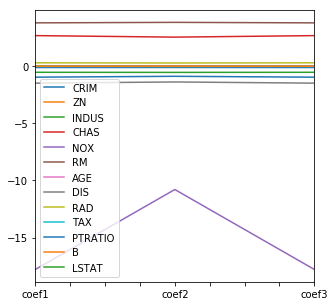

In [25]:
result.plot(figsize=(5,5))
plt.show()

Ridge: all features are set toward zero but not zero. If the tuning parameter is zero, the coefficients are the same as coefficients of linear regression.

<h4> Problem #4-3.Ridge Regression (part 2) </h4>  <br>
Fit a ridge regression with λ = 5, 10, 50, 100, and 1000. For each value, report the estimated coefficients for the fitted model (do not just print summary, make a DataFrame with feature names and estimated coefficients)
- What happens to the coefficients as you increase λ?
- What happens to the flexibility of the model as you increase λ?

In [55]:
from sklearn.linear_model import Ridge
frames = [] 
def ridge_regression(alp, row_name):
    ridge=Ridge(alpha=alp).fit(df.iloc[:,0:13], df['MEDV'])
    coef_df=pd.DataFrame(data=ridge.coef_.reshape(1,-1), columns=dataset.feature_names, index=[row_name])
    frames.append(coef_df)

alpha=[(5,'5coef'), (10,'10coef'), (50,'50coef'), (100, '100coef'), (1000,'1000coef')] 
                                                   
for (i,j) in alpha:
    ridge_regression(i, j)

result = pd.concat(frames)
result 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5coef,-0.100720,0.048751,-0.035672,2.231137,-4.191957,3.808307,-0.010293,-1.275554,0.278221,-0.013619,-0.810244,0.010068,-0.548615
10coef,-0.100352,0.049547,-0.042745,1.953452,-2.374959,3.698132,-0.010674,-1.248455,0.279016,-0.013989,-0.798335,0.010117,-0.560097
50coef,-0.101349,0.052741,-0.050729,1.006646,-0.528400,2.932370,-0.004783,-1.200640,0.300107,-0.015205,-0.815534,0.009824,-0.618763
100coef,-0.101451,0.054470,-0.052626,0.638647,-0.263245,2.331966,0.001230,-1.153157,0.314915,-0.015852,-0.829503,0.009471,-0.661312
1000coef,-0.090546,0.054363,-0.036190,0.101465,-0.016038,0.568084,0.030575,-0.612614,0.310552,-0.016599,-0.659166,0.008057,-0.763962


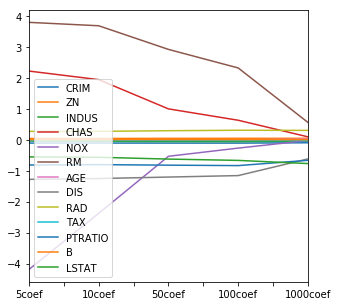

In [56]:
result.plot(figsize=(5,5))
plt.show()

What happens to the coefficients as you increase λ?<br>
The coefficients tend to zero.<br><br>
What happens to the flexibility of the model as you increase λ?<br>
The flexibility do not change.

<h4> Problem #4-4 Lasso Regression </h4>  <br>
In this part, you should download and analyze **"Boston House Prices"** dataset. <br>


Follow steps to answer questions.
- Fit a linear regression model with all features and report the estimated coefficients for the fitted model (do not just print summary, make a DataFrame with feature names and estimated coefficients) 
-  Fit a lasso regression model with λ = 1. Report the estimated coefficients for the fitted model. 
-  Fit a lasso regression model with λ = 0. Report the estimated coefficients for the fitted model. 
- Compare estimated coefficients of lasso regression models with λ = 1 and λ = 0, ridge regression models with λ = 1 and λ = 0 and linear regression model. (you can use descriptive statistics)

- What did you observe from this comparison? 

- Comment your observation.

In [281]:
from sklearn.linear_model import LinearRegression
dataset = load_boston()
df=pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['MEDV']=dataset.target
linreg= LinearRegression().fit(df.iloc[:,0:13], df['MEDV'])
coef_df1=pd.DataFrame(data=linreg.coef_.reshape(1,-1), columns=dataset.feature_names, index=['coef'])
coef_df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
coef,-0.107171,0.046395,0.02086,2.688561,-17.795759,3.804752,0.000751,-1.475759,0.305655,-0.012329,-0.953464,0.009393,-0.525467


In [282]:
#Q2
from sklearn.linear_model import Lasso
LassoModel=Lasso(alpha=1).fit(df.iloc[:,0:13], df['MEDV'])
coef_df2=pd.DataFrame(data=LassoModel.coef_.reshape(1,-1), columns=dataset.feature_names, index=['coef'])
coef_df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
coef,-0.063423,0.049169,-0.0,0.0,-0.0,0.946786,0.020927,-0.669009,0.264175,-0.015209,-0.723199,0.008291,-0.761433


In [283]:
LassoModel=Lasso(alpha=0).fit(df.iloc[:,0:13], df['MEDV'])
coef_df3=pd.DataFrame(data=LassoModel.coef_.reshape(1,-1), columns=dataset.feature_names, index=['coef'])
coef_df3

/Users/autumn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
/Users/autumn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/autumn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
coef,-0.107171,0.046395,0.02086,2.688561,-17.795759,3.804752,0.000751,-1.475759,0.305655,-0.012329,-0.953464,0.009393,-0.525467


In [284]:
frames = [coef_df1, coef_df2, coef_df3]
result = pd.concat(frames)
result

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
coef,-0.107171,0.046395,0.02086,2.688561,-17.795759,3.804752,0.000751,-1.475759,0.305655,-0.012329,-0.953464,0.009393,-0.525467
coef,-0.063423,0.049169,-0.00000,0.000000,-0.000000,0.946786,0.020927,-0.669009,0.264175,-0.015209,-0.723199,0.008291,-0.761433
coef,-0.107171,0.046395,0.02086,2.688561,-17.795759,3.804752,0.000751,-1.475759,0.305655,-0.012329,-0.953464,0.009393,-0.525467


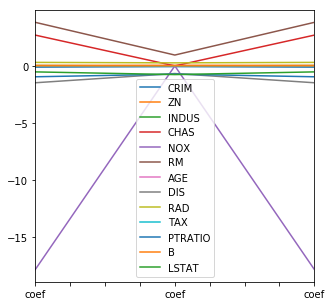

In [285]:
result.plot(figsize=(5,5))
plt.show()

Lasso: subset of features can be selected, and other coefficients are set to zero. When the tuning parameter is sufficiently large, some coefficients will be forced to be zero. If the tuning parameter is zero, the coefficients are the same as coefficients of linear regression.<br>
I observe that there are obvious change of 'CHAS', 'NOX' and 'RM', which are approach to zero. And 'CHAS', 'NOX' and 'INDUS' become zero. 

<h4> Problem #4-5.Lasso Regression (part 2) </h4>  <br>
Fit a lasso regression with λ = 5, 10, 50, 100, and 1000. For each value, report the estimated coefficients for the fitted model (do not just print summary, make a DataFrmae with feature names and estimated coefficients)
- What happens to the coefficients as you increase λ?
- What happens to the flexibility of the model as you increase λ?

In [165]:
#Write your narrative answer here
alpha_list=[5, 10, 50, 100, 1000]
coef_df=pd.DataFrame(columns=dataset.feature_names) 
for i in alpha_list:
    LassoModel=Lasso(alpha=i).fit(df.iloc[:,0:13], df['MEDV'])
    coef_df.loc[i] = LassoModel.coef_
coef_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,-0.0,0.043437,-0.0,0.0,-0.0,0.0,0.036553,-0.0,0.0,-0.006554,-0.0,0.009463,-0.742679
10,-0.0,0.029071,-0.0,0.0,-0.0,0.0,0.000000,-0.0,0.0,-0.007961,-0.0,0.010795,-0.552247
50,-0.0,0.000000,-0.0,0.0,-0.0,0.0,-0.000000,0.0,0.0,-0.019997,-0.0,0.013187,-0.000000
100,-0.0,0.000000,-0.0,0.0,-0.0,0.0,-0.000000,0.0,-0.0,-0.019489,-0.0,0.007723,-0.000000
1000,-0.0,0.000000,-0.0,0.0,-0.0,0.0,-0.000000,0.0,-0.0,-0.000000,-0.0,0.000000,-0.000000


Q1:<br>
As the increasing of λ, coefficients become less and some of them become zero.<br>
Q2:<br>
As the increasing of λ, the model become more flexibility.


<h3>  Problem #5.Logistic Regression [30 points] </h3> 

<h4> Problem #5-1. </h4>  <br>
We fit a logistic regression model to predict the probability that an individual will default on his/her credit card balance. We used the total balance (single feature) to fit the model and got the results shown in the table below.

|        |Coefficient| Std.error|Z -statistic|P-Value|
|:--:|:-------------------------------:|
|Intercept|-10.6513|0.3612|-29.5|<0.0001|
|balance|0.0055|0.002|24.9|<0.0001|

- What is the parametric model used in logistic regression?
- What is the probability that an individual with a balance equal to 15000 dollar will default?
- What is the probability that an individual with balance equals to 800 dollar will not default?

Q1:<br>
linear regression<br>
Q2:<br>
100%<br>
Q3:<br>
99.8%

<h4> Problem #5-2. </h4>  <br>

The coefficients of logistic regression are obtained by maximizing the likelihood function

\begin{array} \\
l(\beta) = \prod_{i:y_{i}=1} P(y_{i} = 1|x)\prod_{i{}':y_{{i}'}=0} (1-P(y_{{i}'} = 1|x))
\end{array}
Show that maximizing the
likelihood function is equivalent to minimizing the cost function $J(\beta)$, such that.
\begin{array} \\
J(\beta) = -\sum [y_{i} log(P(y_{i} = 1|x)) + (1- y_{i})log(1- P(y_{i} = 1|x))]
\end{array}


Here $n$ is the number training examples. Mention one possible method for obtaining the
optimal coefficients.

Answer: Let n be large enough to obtain the optimal coefficients.